In [656]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Training data

In [657]:
train = pd.read_excel('Data_Train.xlsx')

In [658]:
train['Mileage'] = train['Mileage'].str.replace(' km/kg', '')
train['Mileage'] = train['Mileage'].str.replace(' kmpl', '')
train['Mileage'] = pd.to_numeric(train['Mileage'], errors='coerce')

In [659]:
train['Engine'] = train['Engine'].str.replace(' CC', '')
train['Engine'] = pd.to_numeric(train['Engine'], errors='coerce')

In [660]:
train['Power'] = train['Power'].str.replace(' bhp', '')
train['Power'] = train['Power'].str.replace('null', '0.0')
train['Power'] = pd.to_numeric(train['Power'], errors='coerce')

In [661]:
print(train.head())
print(train.info())

                               Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  
0       CNG       Manual      First    26.60   998.0   58.16    5.0   1.75  
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0  12.50  
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   4.50  
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   6.00  
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0  17.74  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data co

In [662]:
train['Mileage'].replace(0.0, np.nan, inplace=True)
print("Mean of Mileage =", np.mean(train['Mileage']))
train['Mileage'].fillna(value=np.mean(train['Mileage']),inplace=True)

train['Engine'].replace(0.0, np.nan, inplace=True)
print("Mean of Engine =", np.mean(train['Engine']))
train['Engine'].fillna(value=np.mean(train['Engine']),  inplace=True)

train['Power'].replace(0.0, np.nan, inplace=True)
print("Mean of Power =", np.mean(train['Power']))
train['Power'].fillna(value=np.mean(train['Power']), inplace=True)

train['Seats'].replace(0.0, np.nan, inplace=True)
print("Mean of Seats = ", np.mean(train['Seats']))
train['Seats'].fillna(value=np.mean(train['Seats']), inplace=True)

Mean of Mileage = 18.342252479408305
Mean of Engine = 1621.276449941501
Mean of Power = 113.25304969366915
Mean of Seats =  5.2796184738955825


In [663]:
train.Name.unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [664]:
namemapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Name']))}
train['Name'] = train['Name'].map(namemapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1201.0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,513.0,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,487.0,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,1060.0,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,24.0,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1160.0,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,669.0,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,933.0,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,1208.0,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [665]:
train.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [666]:
locationmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Location']))}
train['Location'] = train['Location'].map(locationmapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1201.0,10.0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,513.0,11.0,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,487.0,3.0,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,1060.0,3.0,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,24.0,4.0,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1160.0,5.0,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,669.0,7.0,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,933.0,7.0,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,1208.0,9.0,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [667]:
train.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [668]:
fueltypemapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Fuel_Type']))}
train['Fuel_Type'] = train['Fuel_Type'].map(fueltypemapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1201.0,10.0,2010,72000,1.0,Manual,First,26.60,998.0,58.16,5.0,1.75
1,513.0,11.0,2015,41000,2.0,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,487.0,3.0,2011,46000,5.0,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,1060.0,3.0,2012,87000,2.0,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,24.0,4.0,2013,40670,2.0,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1160.0,5.0,2014,27365,2.0,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,669.0,7.0,2015,100000,2.0,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,933.0,7.0,2012,55000,2.0,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,1208.0,9.0,2013,46000,5.0,Manual,First,18.90,998.0,67.10,5.0,2.65


In [669]:
train.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [670]:
transmissionmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Transmission']))}
train['Transmission'] = train['Transmission'].map(transmissionmapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1201.0,10.0,2010,72000,1.0,2.0,First,26.60,998.0,58.16,5.0,1.75
1,513.0,11.0,2015,41000,2.0,2.0,First,19.67,1582.0,126.20,5.0,12.50
2,487.0,3.0,2011,46000,5.0,2.0,First,18.20,1199.0,88.70,5.0,4.50
3,1060.0,3.0,2012,87000,2.0,2.0,First,20.77,1248.0,88.76,7.0,6.00
4,24.0,4.0,2013,40670,2.0,1.0,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1160.0,5.0,2014,27365,2.0,2.0,First,28.40,1248.0,74.00,5.0,4.75
6015,669.0,7.0,2015,100000,2.0,2.0,First,24.40,1120.0,71.00,5.0,4.00
6016,933.0,7.0,2012,55000,2.0,2.0,Second,14.00,2498.0,112.00,8.0,2.90
6017,1208.0,9.0,2013,46000,5.0,2.0,First,18.90,998.0,67.10,5.0,2.65


In [671]:
train.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [672]:
ownertypemapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Owner_Type']))}
train['Owner_Type'] = train['Owner_Type'].map(ownertypemapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1201.0,10.0,2010,72000,1.0,2.0,1.0,26.60,998.0,58.16,5.0,1.75
1,513.0,11.0,2015,41000,2.0,2.0,1.0,19.67,1582.0,126.20,5.0,12.50
2,487.0,3.0,2011,46000,5.0,2.0,1.0,18.20,1199.0,88.70,5.0,4.50
3,1060.0,3.0,2012,87000,2.0,2.0,1.0,20.77,1248.0,88.76,7.0,6.00
4,24.0,4.0,2013,40670,2.0,1.0,3.0,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1160.0,5.0,2014,27365,2.0,2.0,1.0,28.40,1248.0,74.00,5.0,4.75
6015,669.0,7.0,2015,100000,2.0,2.0,1.0,24.40,1120.0,71.00,5.0,4.00
6016,933.0,7.0,2012,55000,2.0,2.0,3.0,14.00,2498.0,112.00,8.0,2.90
6017,1208.0,9.0,2013,46000,5.0,2.0,1.0,18.90,998.0,67.10,5.0,2.65


In [673]:
yearmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Year']))}
train['Year'] = train['Year'].map(yearmapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1201.0,10.0,13.0,72000,1.0,2.0,1.0,26.60,998.0,58.16,5.0,1.75
1,513.0,11.0,18.0,41000,2.0,2.0,1.0,19.67,1582.0,126.20,5.0,12.50
2,487.0,3.0,14.0,46000,5.0,2.0,1.0,18.20,1199.0,88.70,5.0,4.50
3,1060.0,3.0,15.0,87000,2.0,2.0,1.0,20.77,1248.0,88.76,7.0,6.00
4,24.0,4.0,16.0,40670,2.0,1.0,3.0,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1160.0,5.0,17.0,27365,2.0,2.0,1.0,28.40,1248.0,74.00,5.0,4.75
6015,669.0,7.0,18.0,100000,2.0,2.0,1.0,24.40,1120.0,71.00,5.0,4.00
6016,933.0,7.0,15.0,55000,2.0,2.0,3.0,14.00,2498.0,112.00,8.0,2.90
6017,1208.0,9.0,16.0,46000,5.0,2.0,1.0,18.90,998.0,67.10,5.0,2.65


In [674]:
drivenmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Kilometers_Driven']))}
train['Kilometers_Driven'] = train['Kilometers_Driven'].map(drivenmapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1201.0,10.0,13.0,2363.0,1.0,2.0,1.0,26.60,998.0,58.16,5.0,1.75
1,513.0,11.0,18.0,1129.0,2.0,2.0,1.0,19.67,1582.0,126.20,5.0,12.50
2,487.0,3.0,14.0,1357.0,5.0,2.0,1.0,18.20,1199.0,88.70,5.0,4.50
3,1060.0,3.0,15.0,2694.0,2.0,2.0,1.0,20.77,1248.0,88.76,7.0,6.00
4,24.0,4.0,16.0,1121.0,2.0,1.0,3.0,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1160.0,5.0,17.0,597.0,2.0,2.0,1.0,28.40,1248.0,74.00,5.0,4.75
6015,669.0,7.0,18.0,2829.0,2.0,2.0,1.0,24.40,1120.0,71.00,5.0,4.00
6016,933.0,7.0,15.0,1710.0,2.0,2.0,3.0,14.00,2498.0,112.00,8.0,2.90
6017,1208.0,9.0,16.0,1357.0,5.0,2.0,1.0,18.90,998.0,67.10,5.0,2.65


In [675]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   float64
 1   Location           6019 non-null   float64
 2   Year               6019 non-null   float64
 3   Kilometers_Driven  6019 non-null   float64
 4   Fuel_Type          6019 non-null   float64
 5   Transmission       6019 non-null   float64
 6   Owner_Type         6019 non-null   float64
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(12)
memory usage: 564.4 KB


In [676]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Random Forest part

In [689]:
from sklearn.ensemble import RandomForestRegressor
x_rf = train.iloc[:, :-1].values
y_rf = train['Price'].values
xtrain_rf, xtest_rf, ytrain_rf, ytest_rf = train_test_split(x_rf, y_rf, test_size=0.1, random_state=1)

forest_rf = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest_rf.fit(xtrain_rf, ytrain_rf)
ytrainpredict_rf = forest_rf.predict(xtrain_rf)
ytestpredict_rf = forest_rf.predict(xtest_rf)

In [690]:
print(f'MSE train: {(mean_squared_error(ytrain_rf, ytrainpredict_rf))}, test {(mean_squared_error(ytest_rf, ytestpredict_rf))}')
print(f'R^2 train: {(r2_score(ytrain_rf, ytrainpredict_rf))}, test {(r2_score(ytest_rf, ytestpredict_rf))}')

MSE train: 1.8389909163251312, test 11.27566996588772
R^2 train: 0.9852652866141361, test 0.9120443272963676


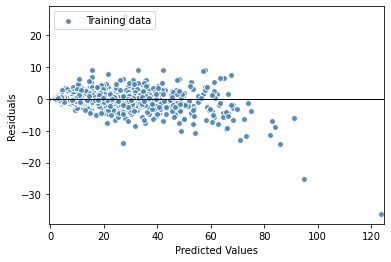

In [691]:
plt.scatter(ytrainpredict_rf, ytrainpredict_rf-ytrain_rf, c='steelblue', marker='o', edgecolors='white', s=35, alpha=0.9, label="Training data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytrainpredict_rf.min()-2, xmax=ytrainpredict_rf.max()+5, lw=1, color='black')
plt.xlim([ytrainpredict_rf.min()-1, ytrainpredict_rf.max()+1])
plt.show()

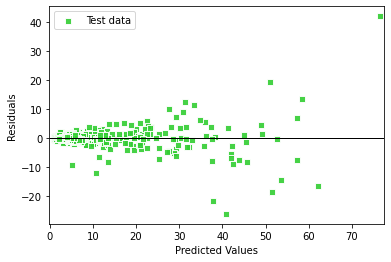

In [692]:
plt.scatter(ytestpredict_rf, ytestpredict_rf-ytest_rf, c='limegreen', marker='s', edgecolors='white', s=35, alpha=0.9, label="Test data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_rf.min()-1, xmax=ytestpredict_rf.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_rf.min()-1, ytestpredict_rf.max()+1])
plt.show()

### Linear Regression

In [706]:
from sklearn.linear_model import LinearRegression
x_lr = train.iloc[:, :-1].values
y_lr = train['Price'].values
xtrain_lr, xtest_lr, ytrain_lr, ytest_lr = train_test_split(x_lr, y_lr, test_size=0.9, random_state=1)
slr = LinearRegression()
slr.fit(xtrain_lr, ytrain_lr)
ytrainpredict_lr = slr.predict(xtrain_lr)
ytestpredict_lr = slr.predict(xtest_lr)

In [707]:
print(f'MSE train: {(mean_squared_error(ytrain_lr, ytrainpredict_lr))}, test {(mean_squared_error(ytest_lr, ytestpredict_lr))}')
print(f'R^2 train: {(r2_score(ytrain_lr, ytrainpredict_lr))}, test {(r2_score(ytest_lr, ytestpredict_lr))}')

MSE train: 38.43732002614403, test 37.250132429514096
R^2 train: 0.7092825412314214, test 0.7004768697409725


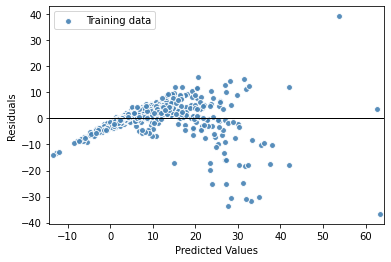

In [708]:
plt.scatter(ytrainpredict_lr, ytrainpredict_lr - ytrain_lr, c='steelblue', marker='o', edgecolors='white', s=35, alpha=0.9, label="Training data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytrainpredict_lr.min()-2, xmax=ytrainpredict_lr.max()+5, lw=1, color='black')
plt.xlim([ytrainpredict_lr.min()-1, ytrainpredict_lr.max()+1])
plt.show()

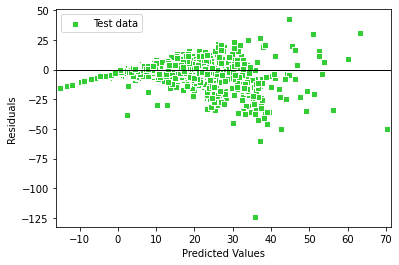

In [709]:
plt.scatter(ytestpredict_lr, ytestpredict_lr-ytest_lr, c='limegreen', marker='s', edgecolors='white', s=30, alpha=0.99, label="Test data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_lr.min()-1, xmax=ytestpredict_lr.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_lr.min()-1, ytestpredict_lr.max()+1])
plt.show()

### Test Data

In [710]:
test = pd.read_excel('Data_Test.xlsx')

In [711]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [712]:
test.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [713]:
test['Mileage'] = test['Mileage'].str.replace(' km/kg', '')
test['Mileage'] = test['Mileage'].str.replace(' kmpl', '')
test['Mileage'] = pd.to_numeric(test['Mileage'], errors='coerce')

In [714]:
test['Engine'] = test['Engine'].str.replace(' CC', '')
test['Engine'] = pd.to_numeric(test['Engine'], errors='coerce')

In [715]:
test['Power'] = test['Power'].str.replace(' bhp', '')
test['Power'] = test['Power'].str.replace('null', '0.0')
test['Power'] = pd.to_numeric(test['Power'], errors='coerce')

In [716]:
test['Mileage'].replace(0.0,np.nan,inplace=True)
print("Mean of Mileage =",np.mean(test['Mileage']))
test['Mileage'].fillna(value=np.mean(test['Mileage']),inplace=True)
test['Engine'].replace(0.0,np.nan,inplace=True)
print("Mean of Engine =",np.mean(test['Engine']))
test['Engine'].fillna(value=np.mean(test['Engine']),inplace=True)
test['Power'].replace(0.0,np.nan,inplace=True)
print("Mean of Power =",np.mean(test['Power']))
test['Power'].fillna(value=np.mean(test['Power']),inplace=True)
test['Seats'].replace(0.0,np.nan,inplace=True)
print("Mean of Seats =",np.mean(test['Seats']))
test['Seats'].fillna(value=np.mean(test['Seats']),inplace=True)

Mean of Mileage = 18.36735462735463
Mean of Engine = 1593.5849673202615
Mean of Power = 110.38042013311147
Mean of Seats = 5.28454619787408


In [717]:
test['Name'] = test['Name'].map(namemapping).astype(float)
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,963.0,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20000,4.0
1,953.0,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30000,5.0
2,NaN,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80000,7.0
3,1720.0,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,110.38042,5.0
4,759.0,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,1850.0,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60000,5.0
1230,1829.0,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60000,5.0
1231,1379.0,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10000,5.0
1232,1829.0,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60000,5.0


In [718]:
test['Location'] = test['Location'].map(locationmapping).astype(float)
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,963.0,5.0,2014,40929,CNG,Manual,First,32.26,998.0,58.20000,4.0
1,953.0,4.0,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30000,5.0
2,NaN,10.0,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80000,7.0
3,1720.0,6.0,2012,139000,Diesel,Manual,First,23.59,1364.0,110.38042,5.0
4,759.0,10.0,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,1850.0,6.0,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60000,5.0
1230,1829.0,10.0,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60000,5.0
1231,1379.0,9.0,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10000,5.0
1232,1829.0,11.0,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60000,5.0


In [719]:
test['Fuel_Type'] = test['Fuel_Type'].map(fueltypemapping).astype(float)
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,963.0,5.0,2014,40929,1.0,Manual,First,32.26,998.0,58.20000,4.0
1,953.0,4.0,2013,54493,5.0,Manual,Second,24.70,796.0,47.30000,5.0
2,NaN,10.0,2017,34000,2.0,Manual,First,13.68,2393.0,147.80000,7.0
3,1720.0,6.0,2012,139000,2.0,Manual,First,23.59,1364.0,110.38042,5.0
4,759.0,10.0,2014,29000,5.0,Manual,First,18.50,1197.0,82.85000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,1850.0,6.0,2011,89411,2.0,Manual,First,20.54,1598.0,103.60000,5.0
1230,1829.0,10.0,2015,59000,5.0,Automatic,First,17.21,1197.0,103.60000,5.0
1231,1379.0,9.0,2012,28000,2.0,Manual,First,23.08,1461.0,63.10000,5.0
1232,1829.0,11.0,2013,52262,5.0,Automatic,Third,17.20,1197.0,103.60000,5.0


In [720]:
test['Transmission'] = test['Transmission'].map(transmissionmapping).astype(float)
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,963.0,5.0,2014,40929,1.0,2.0,First,32.26,998.0,58.20000,4.0
1,953.0,4.0,2013,54493,5.0,2.0,Second,24.70,796.0,47.30000,5.0
2,NaN,10.0,2017,34000,2.0,2.0,First,13.68,2393.0,147.80000,7.0
3,1720.0,6.0,2012,139000,2.0,2.0,First,23.59,1364.0,110.38042,5.0
4,759.0,10.0,2014,29000,5.0,2.0,First,18.50,1197.0,82.85000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,1850.0,6.0,2011,89411,2.0,2.0,First,20.54,1598.0,103.60000,5.0
1230,1829.0,10.0,2015,59000,5.0,1.0,First,17.21,1197.0,103.60000,5.0
1231,1379.0,9.0,2012,28000,2.0,2.0,First,23.08,1461.0,63.10000,5.0
1232,1829.0,11.0,2013,52262,5.0,1.0,Third,17.20,1197.0,103.60000,5.0


In [721]:
test['Owner_Type'] = test['Owner_Type'].map(ownertypemapping).astype(float)
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,963.0,5.0,2014,40929,1.0,2.0,1.0,32.26,998.0,58.20000,4.0
1,953.0,4.0,2013,54493,5.0,2.0,3.0,24.70,796.0,47.30000,5.0
2,NaN,10.0,2017,34000,2.0,2.0,1.0,13.68,2393.0,147.80000,7.0
3,1720.0,6.0,2012,139000,2.0,2.0,1.0,23.59,1364.0,110.38042,5.0
4,759.0,10.0,2014,29000,5.0,2.0,1.0,18.50,1197.0,82.85000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,1850.0,6.0,2011,89411,2.0,2.0,1.0,20.54,1598.0,103.60000,5.0
1230,1829.0,10.0,2015,59000,5.0,1.0,1.0,17.21,1197.0,103.60000,5.0
1231,1379.0,9.0,2012,28000,2.0,2.0,1.0,23.08,1461.0,63.10000,5.0
1232,1829.0,11.0,2013,52262,5.0,1.0,4.0,17.20,1197.0,103.60000,5.0


In [722]:
test['Year'] = test['Year'].astype(float)
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,963.0,5.0,2014.0,40929,1.0,2.0,1.0,32.26,998.0,58.20000,4.0
1,953.0,4.0,2013.0,54493,5.0,2.0,3.0,24.70,796.0,47.30000,5.0
2,NaN,10.0,2017.0,34000,2.0,2.0,1.0,13.68,2393.0,147.80000,7.0
3,1720.0,6.0,2012.0,139000,2.0,2.0,1.0,23.59,1364.0,110.38042,5.0
4,759.0,10.0,2014.0,29000,5.0,2.0,1.0,18.50,1197.0,82.85000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,1850.0,6.0,2011.0,89411,2.0,2.0,1.0,20.54,1598.0,103.60000,5.0
1230,1829.0,10.0,2015.0,59000,5.0,1.0,1.0,17.21,1197.0,103.60000,5.0
1231,1379.0,9.0,2012.0,28000,2.0,2.0,1.0,23.08,1461.0,63.10000,5.0
1232,1829.0,11.0,2013.0,52262,5.0,1.0,4.0,17.20,1197.0,103.60000,5.0


In [723]:
test['Kilometers_Driven'] = test['Kilometers_Driven'].astype(float)
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,963.0,5.0,2014.0,40929.0,1.0,2.0,1.0,32.26,998.0,58.20000,4.0
1,953.0,4.0,2013.0,54493.0,5.0,2.0,3.0,24.70,796.0,47.30000,5.0
2,NaN,10.0,2017.0,34000.0,2.0,2.0,1.0,13.68,2393.0,147.80000,7.0
3,1720.0,6.0,2012.0,139000.0,2.0,2.0,1.0,23.59,1364.0,110.38042,5.0
4,759.0,10.0,2014.0,29000.0,5.0,2.0,1.0,18.50,1197.0,82.85000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,1850.0,6.0,2011.0,89411.0,2.0,2.0,1.0,20.54,1598.0,103.60000,5.0
1230,1829.0,10.0,2015.0,59000.0,5.0,1.0,1.0,17.21,1197.0,103.60000,5.0
1231,1379.0,9.0,2012.0,28000.0,2.0,2.0,1.0,23.08,1461.0,63.10000,5.0
1232,1829.0,11.0,2013.0,52262.0,5.0,1.0,4.0,17.20,1197.0,103.60000,5.0


In [724]:
test['Name'].fillna(0.0, inplace=True)
test['Location'].fillna(0.0, inplace=True)
test['Year'].fillna(0.0, inplace=True)
test['Kilometers_Driven'].fillna(0.0, inplace=True)
test['Fuel_Type'].fillna(0.0, inplace=True)
test['Transmission'].fillna(0.0, inplace=True)
test['Owner_Type'].fillna(0.0, inplace=True)


In [725]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   float64
 1   Location           1234 non-null   float64
 2   Year               1234 non-null   float64
 3   Kilometers_Driven  1234 non-null   float64
 4   Fuel_Type          1234 non-null   float64
 5   Transmission       1234 non-null   float64
 6   Owner_Type         1234 non-null   float64
 7   Mileage            1234 non-null   float64
 8   Engine             1234 non-null   float64
 9   Power              1234 non-null   float64
 10  Seats              1234 non-null   float64
dtypes: float64(11)
memory usage: 106.2 KB


In [726]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [727]:
x_testdata = test.iloc[:, :].values

#### Random Forest part

In [728]:
ytestpredict_rf = forest_rf.predict(x_testdata)
test['Predicted Price(RF)'] = ytestpredict_rf

In [729]:
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Predicted Price(RF)
0,963.0,5.0,2014.0,40929.0,1.0,2.0,1.0,32.26,998.0,58.20000,4.0,3.978330
1,953.0,4.0,2013.0,54493.0,5.0,2.0,3.0,24.70,796.0,47.30000,5.0,3.922830
2,0.0,10.0,2017.0,34000.0,2.0,2.0,1.0,13.68,2393.0,147.80000,7.0,18.880533
3,1720.0,6.0,2012.0,139000.0,2.0,2.0,1.0,23.59,1364.0,110.38042,5.0,11.308860
4,759.0,10.0,2014.0,29000.0,5.0,2.0,1.0,18.50,1197.0,82.85000,5.0,5.897910
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1850.0,6.0,2011.0,89411.0,2.0,2.0,1.0,20.54,1598.0,103.60000,5.0,8.742130
1230,1829.0,10.0,2015.0,59000.0,5.0,1.0,1.0,17.21,1197.0,103.60000,5.0,8.317340
1231,1379.0,9.0,2012.0,28000.0,2.0,2.0,1.0,23.08,1461.0,63.10000,5.0,3.941030
1232,1829.0,11.0,2013.0,52262.0,5.0,1.0,4.0,17.20,1197.0,103.60000,5.0,8.130820


### Linear Regression

In [730]:
ytestpredict_lr = slr.predict(x_testdata)
test['Predicted Price(LR)'] = ytestpredict_lr

In [731]:
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Predicted Price(RF),Predicted Price(LR)
0,963.0,5.0,2014.0,40929.0,1.0,2.0,1.0,32.26,998.0,58.20000,4.0,3.978330,1646.022146
1,953.0,4.0,2013.0,54493.0,5.0,2.0,3.0,24.70,796.0,47.30000,5.0,3.922830,1625.966762
2,0.0,10.0,2017.0,34000.0,2.0,2.0,1.0,13.68,2393.0,147.80000,7.0,18.880533,1667.302766
3,1720.0,6.0,2012.0,139000.0,2.0,2.0,1.0,23.59,1364.0,110.38042,5.0,11.308860,1539.282102
4,759.0,10.0,2014.0,29000.0,5.0,2.0,1.0,18.50,1197.0,82.85000,5.0,5.897910,1658.929080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1850.0,6.0,2011.0,89411.0,2.0,2.0,1.0,20.54,1598.0,103.60000,5.0,8.742130,1593.820000
1230,1829.0,10.0,2015.0,59000.0,5.0,1.0,1.0,17.21,1197.0,103.60000,5.0,8.317340,1630.677610
1231,1379.0,9.0,2012.0,28000.0,2.0,2.0,1.0,23.08,1461.0,63.10000,5.0,3.941030,1658.303476
1232,1829.0,11.0,2013.0,52262.0,5.0,1.0,4.0,17.20,1197.0,103.60000,5.0,8.130820,1637.227815


In [732]:
test['Predicted Price(LR)'].value_counts()

1634.504296    2
1593.047642    1
1648.158104    1
1616.390765    1
1297.712320    1
              ..
1651.106930    1
1652.984704    1
1620.148633    1
1535.575532    1
1658.303476    1
Name: Predicted Price(LR), Length: 1233, dtype: int64